### Volatility estimator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def garman_klass_volatility(series, window = 21) :
    """
    Function to calculate Garman-Klass volatility
    """
    a = (np.log(series['High'] / series['Low']) ** 2).rolling(window = window).mean() * 0.5
    b = (2 * np.log(2) - 1) * (np.log(series['Close'] / series['Open']) ** 2).rolling(window = window).mean()
    return np.sqrt(a - b)

def rogers_satchell_volatility(series, window = 21) :
    """
    Function to calculate Rogers-Satchell volatility
    """
    a = (np.log(series['High'] / series['Close']) * np.log(series['High'] / series['Open'])).rolling(window = window).mean()
    b = (np.log(series['Low'] / series['Close']) * np.log(series['Low'] / series['Open'])).rolling(window = window).mean()
    return np.sqrt(a + b)

def yang_zhang_volatility(series, window = 21) :
    """
    Function to calculate Yang-Zhang volatility
    """
    a = (np.log(series['Open'] / series['Close'].shift(1))).rolling(window = window).mean()
    vol_open = ((np.log(series['Open'] / series['Close'].shift(1)) - a) ** 2).rolling(window = window).mean()
    b = (np.log(series['Close'] / series['Open'])).rolling(window = window).mean()
    vol_close = ((np.log(series['Close'] / series['Open']) - b) ** 2).rolling(window = window).mean()
    vol_rogers_satchell = rogers_satchell_volatility(series, window)
    k = 0.34 / (1.34 + (window + 1) / (window - 1))
    
    yz_volatility = np.sqrt(
        vol_open + k * vol_close + (1 - k) * (vol_rogers_satchell ** 2)
    )
    
    return yz_volatility

def intrinsic_entropy(series, total_volume, window = 21) :
    h_co = - (
        np.log(series['Open'] / series['Close'].shift(1)) * 
        (series['Volume'] / total_volume) * 
        np.log(series['Volume'].shift(1) / total_volume)
    ).rolling(window = window).mean()
    
    h_oc = - (
        np.log(series['Close'] / series['Open']) * 
        (series['Volume'] / total_volume) * 
        np.log(series['Volume'] / total_volume)
    ).rolling(window = window).mean()
    
    h_ohlc = - (
        (
            (np.log(series['Open'] / series['High']) * np.log(series['High'] / series['Close'])) +
            (np.log(series['Low'] / series['Open']) * np.log(series['Low'] / series['Close']))
        ) * (series['Volume'] / total_volume) * np.log(series['Volume'] / total_volume)
    ).rolling(window = window).mean()
    
    k = 0.34 / (1.34 + (window + 1) / (window - 1))
    
    h = np.abs(h_co + k * h_oc + (1 - k) * h_ohlc)
    return h

In [3]:
# Load the data
import yfinance as yf
ticker = 'AAPL'
data = yf.download(ticker, start = '2010-01-01', end = '2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [21]:
total_volume = yf.download('^GSPC', start = '2010-01-01', end = '2024-01-01')['Volume']

[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'Garman-Klass Volatility'}, xlabel='Date'>

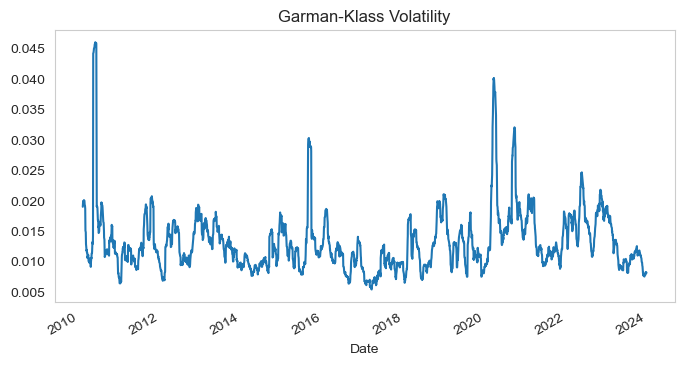

In [8]:
garman_klass_volatility(data).plot(
    figsize = (8, 4),
    title = 'Garman-Klass Volatility',
    grid = False
)

<Axes: title={'center': 'Rogers-Satchell Volatility'}, xlabel='Date'>

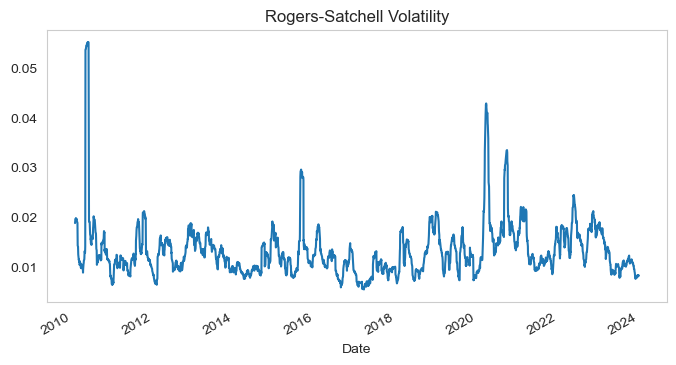

In [9]:
rogers_satchell_volatility(data).plot(
    figsize = (8, 4),
    title = 'Rogers-Satchell Volatility',
    grid = False
)

<Axes: title={'center': 'Yang-Zhang Volatility'}, xlabel='Date'>

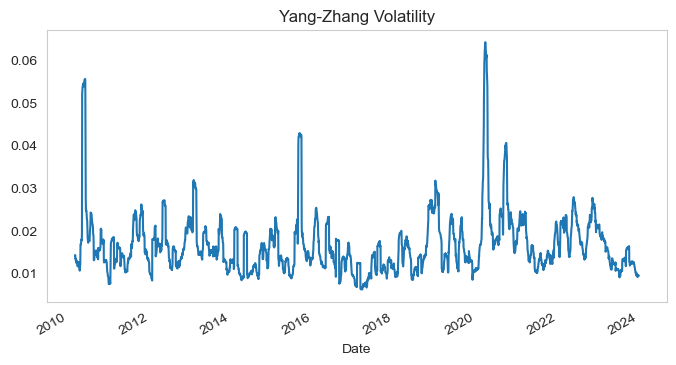

In [10]:
yang_zhang_volatility(data).plot(
    figsize = (8, 4),
    title = 'Yang-Zhang Volatility',
    grid = False
)

<Axes: title={'center': 'Intrinsic Entropy'}, xlabel='Date'>

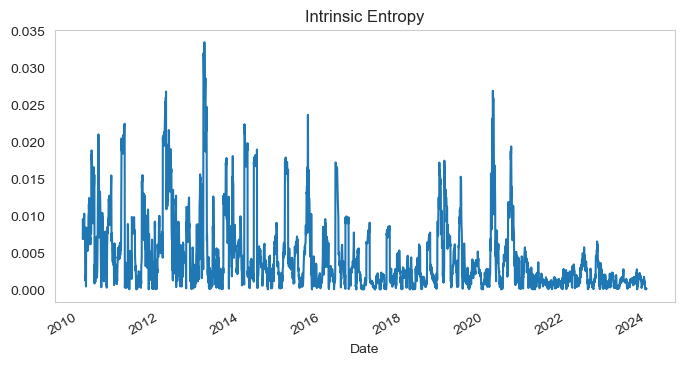

In [28]:
(intrinsic_entropy(data, total_volume = total_volume) * 10).plot(
    figsize = (8, 4),
    title = 'Intrinsic Entropy',
    grid = False
)

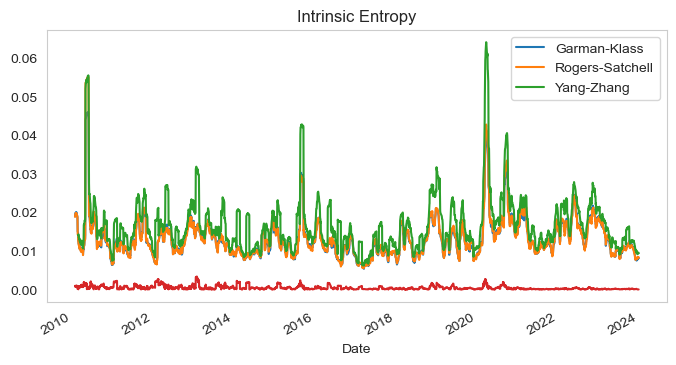

In [30]:
# Plot all the volatility estimators
garman_klass_volatility(data).plot(
    figsize = (8, 4),
    title = 'Volatility Estimators',
    grid = False,
    label = 'Garman-Klass'
)
rogers_satchell_volatility(data).plot(
    figsize = (8, 4),
    grid = False,
    label = 'Rogers-Satchell'
)
yang_zhang_volatility(data).plot(
    figsize = (8, 4),
    grid = False,
    label = 'Yang-Zhang'
)
intrinsic_entropy(data, total_volume = total_volume).plot(
    figsize = (8, 4),
    title = 'Intrinsic Entropy',
    grid = False
)
plt.legend()
plt.show()